<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Pytorch/blob/main/Notebooks/Pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Hi it's Mohamad on 22th September 2022
# mahsaamini

# Classification Model
it's about ditinguishing different objects two (binary calss) or more than two objects (multi-class)


## prerquarities

In [ ]:
# Imports
import torch
import sklearn
from sklearn.datasets import make_circles # For creating data setes
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'1.12.1+cu113'

## 1 . Creating datasets and spliting to train and test data sets

In [ ]:
# Samples
samples = 1000
# Creating data sets
X , y = make_circles(n_samples=samples,
                    noise = 0.03 ,
                    random_state = 42)

In [ ]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
print(f"First 5 samples of X : \n {X[:5]}")
print(f"First 5 samples of y : \n {y[:5]}")

First 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : 
 [1 1 1 1 0]


For better understanding of how our data are represented we could use *panda* library of python

In [ ]:
import pandas as pd
from pandas import DataFrame

In [ ]:
pandas_represent  = DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                        "lable"  : y[:]})
pandas_represent.head(5)

,X1,X2,lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
# just some remembering points
pandas_represent.columns

Index(['X1', 'X2', 'lable'], dtype='object')

In [ ]:
# Note : Really important thing to know about our datat sets is the poprportionate dividence of our data values
pandas_represent.lable.value_counts()

1    500
0    500
Name: lable, dtype: int64

also we could use matplotlib to see how our data are represented (visualize , visualize , visualize)

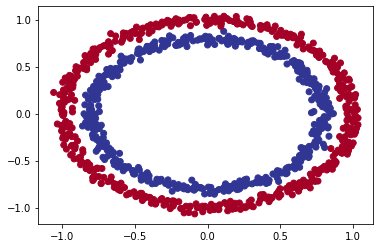

In [ ]:
matplot_represent = plt.scatter(x=X[:,0],
                                y=X[:,1],
                                c=y,
                                cmap=plt.cm.RdYlBu)
matplot_represent

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Turing data sets to the tensors

In [ ]:
type(X) , X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [ ]:
type(X) , X.dtype

(torch.Tensor, torch.float32)

### 1.2 Spliting data sets to the train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size = 0.2 ,# 20 % of data (X) would be splited as test data
                                                       random_state = 42)

In [ ]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(800, 200, 800, 200)

## 2 . Building Model

actuly we are building a model for classifying red and blue dots

steps :

1. setup device agnostic code (so our code would run on accelerator if there is one )
2. Construct a model (by subclassing `nn.Module`)
3. defining a loss function and optimizer
4. Creating test and train loops

### 2.1 Setuping device agnostic code

In [ ]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 2.2 Constructing a model with these features :

1. subclass of `nn.Module`
2. Containing 2 `nn.Linear` layers that can handle our data shapes
3. Defining a `forward()` method for selecting weights and bias of our data
4. Instatiate an instance of our model class and send it to the target `device`

In [ ]:
# Imports
from torch import nn

**Note :** the shape of X and y is important in shaping our model

In [ ]:
X.shape , y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [ ]:
class CircleModel_0(nn.Module) :
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer1 = nn.Linear(in_features = 2 , out_features = 10) # takes in 2 features (same as shaape X) and upscales to 5 features
    self.layer2 = nn.Linear(in_features = 10, out_features = 10) # takes in 5 features from previous layer and outputs a single feature (same shape as y)
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU() # for adding non-linearity to our model
  def forward(self, x) :
    return self.layer3(self.relu(self.layer2(self.relu((self.layer1(x))))))

In [ ]:
# Instantiate an instance of our model class and send it to the target device
model_0 = CircleModel_0().to(device)
model_0

CircleModel_0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.25

**Note :** We could also replicate model above with `nn.Sequentional`

In [ ]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

In [ ]:
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Make predictions for testing our model functionality
with torch.inference_mode() :
  test_preds = model_0(X_test.to(device))
print(f"test preds shape : {test_preds.shape}")
print(f"First 5 predictions are : {test_preds[:5]}")

test preds shape : torch.Size([200, 1])
First 5 predictions are : tensor([[0.0167],
        [0.0207],
        [0.0126],
        [0.0171],
        [0.0420]], device='cuda:0')


### 2.3 defining loss function and optimizer

**loss function :** a function for calculating how much wrong our model predictions are

**optimizer :** in account of adjusting parameters for better predictions of our model

what loss function and optimizers should we use :
*loss function* : Binary Cross Entropy (`nn.BCEWithLogitsLoss`) as for regression
model we used MAE

*optimizer* : SGD or ADAM (`torch.optim.SGD` or `torch.optim.ADAM`)

#### 2.3.1 Setup loss function

In [ ]:
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss but BCEWithLogitsLoss not
loss_fn = nn.BCEWithLogitsLoss()

#### 2.3.2 setup optimizer

In [ ]:
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

#### 2.3.3 setup a accuracy function
for calculating how much correct our predictions are

In [ ]:
def accuracy_fn(y_true,y_pred) :
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3 . Train model

To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

our model outputs are going to be **raw** outputs or in the other word **logits**

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`(for muliclass calssification).

In [ ]:
model_0.eval()
with torch.inference_mode() :
  y_logits = model_0(X_test.to(device))[:5]

y_logits , y_test[:5]

(tensor([[0.0167],
         [0.0207],
         [0.0126],
         [0.0171],
         [0.0420]], device='cuda:0'), tensor([1., 0., 1., 0., 1.]))

as we could see there is no simialirity between our raw logits and y-lables so we need an activation function for converting raw logits to prediction probilities (and then a round function for more simialirity )

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5042],
        [0.5052],
        [0.5032],
        [0.5043],
        [0.5105]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
# Finding prediction lables (predicion probilities -> prediction lables )
y_pred_lable_0 = torch.round(y_pred_probs)

# in full (raw logits -> prediction probilities -> prediction lables)
y_pred_lable_1 = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# For being sure about results
print(torch.eq(y_pred_lable_0,y_pred_lable_1).squeeze(dim=1))

print(y_pred_lable_0.squeeze(dim=1))

tensor([True, True, True, True, True], device='cuda:0')
tensor([1., 1., 1., 1., 1.], device='cuda:0')


**Note :** Now our predictions( *Prediction lables* ) are similar to y-lables

### 3.2 Building training and testing loop

In [ ]:
# seting manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Seting epochs
epochs = 1000

# sending train and test data sets to target device
X_train , X_test = X_train.to(device) , X_test.to(device)
y_train , y_test = y_train.to(device) , y_test.to(device)

# training and evaluating loop
for epoch in range(epochs) :
  ### training
    model_0.train()
    # 1. forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred_lables = torch.round(torch.sigmoid(y_logits)) # raw logits -> prediction probilities -> prediction lables

    # 2. calculate the loss (and accuracy)
    loss = loss_fn(y_logits, # as we used BCEWithLogitsLoss loss function expects raw logits as input and do avtivation in itself
                   y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred_lables)
    # 3. optimizer zero grad
    optimizer.zero_grad()
    # 4. loss backward (backpropagation)
    loss.backward()
    # 5. optmizer step (gradient descent)
    optimizer.step()
  ### testting
    model_0.eval()
    # 1. forward pass
    with torch.inference_mode() :
      y_test_logits = model_0(X_test).squeeze()
      y_test_pred_lables = torch.round(torch.sigmoid(y_test_logits))  # raw logits -> prediction probilities -> prediction lables
    # 2. Calculate loss and accuracy of our predictions
    test_loss = loss_fn(y_test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=y_test_pred_lables)
  ### Printing whats happening
    if (epoch % 100 == 0) :
      print(f"epoch : {epoch}  | loss : {test_loss}  | accuracy : {test_acc}")
# its over

epoch : 0  | loss : 0.6931881308555603  | accuracy : 50.0
epoch : 100  | loss : 0.6910240054130554  | accuracy : 52.5
epoch : 200  | loss : 0.6893960237503052  | accuracy : 55.00000000000001
epoch : 300  | loss : 0.6872316002845764  | accuracy : 56.00000000000001
epoch : 400  | loss : 0.6841148138046265  | accuracy : 56.49999999999999
epoch : 500  | loss : 0.6794120073318481  | accuracy : 56.49999999999999
epoch : 600  | loss : 0.6728507876396179  | accuracy : 56.00000000000001
epoch : 700  | loss : 0.6632164716720581  | accuracy : 59.0
epoch : 800  | loss : 0.647568941116333  | accuracy : 67.5
epoch : 900  | loss : 0.6214525699615479  | accuracy : 79.0


## 4 . Making Predictions and evaluating model

let's make predictions and evaluate our model by **visualizing** the predictions (using function called `plot_decision_boundary()`)

### 4.1 How to import function `plot_decision_boundary()`

In [ ]:
# Imports
import requests
from pathlib import Path

In [ ]:
# adding just some if-else code for the times that function file exists
if Path("helper_function.py").is_file() :
  print("the helper function actully exists right now")
else :
  print("Downloading helper function ")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as file :
    file.write(request.content)

from helper_function import plot_decision_boundary , plot_predictions

the helper function actully exists right now


### 4.2 visualizing predictions

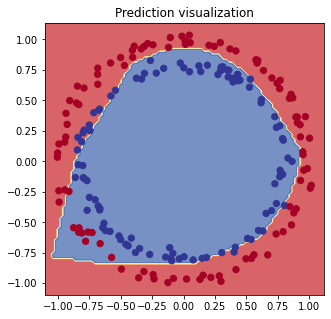

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Prediction visualization")
plot_decision_boundary(model_0,X_test,y_test)

## 5 . extracurricular contents

Improving a model :

1. Add more layers
2. add more hidden units
3. add non-linearity(missing part of lots of models)
4. increasing epochs
5. changing loss function
6. changing learning rate
7. changing activation function

**Note :** these option are from model's prespective not data prespective and make up *hyperparameters*

**hyperparameters :** prameters which get determined by us as machinr learning engineers

## 6 . looking at `nn.ReLU` and `torch.sigmoid` functionality on numbers

In [ ]:
# some introductions

## 7 . Multi-class classification
more number of data classes


### Import dependencies

In [ ]:
# Imports
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### 7.1 creating datasets and spliting to test and train datasets

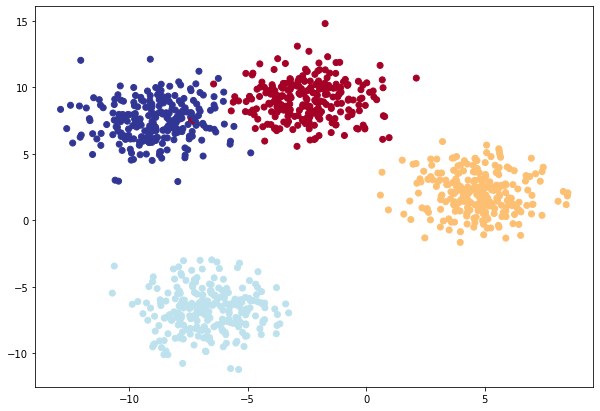

In [ ]:
# seting hyperparameters for data
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1 . Creat multi-class data set
X_blob , y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state= RANDOM_SEED)
# 2 . Turning data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3 . Spliting to train and test data sets
X_blob_train , X_blob_test , y_blob_train , y_blob_test = train_test_split(X_blob,
                                                                           y_blob,
                                                                           test_size = 0.2,
                                                                           random_state=RANDOM_SEED)
# 4 . Ploting data (visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0] ,
            X_blob[:,1] ,
            c=y_blob,
            cmap=plt.cm.RdYlBu)


### 7.2 Building multi-class classification model

In [ ]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# base class for classification model
model_1 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.ReLU() ,
    nn.Linear(in_features=10,out_features=10),
    nn.ReLU() ,
    nn.Linear(in_features=10,out_features=4)
).to(device)

In [ ]:
model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=4, bias=True)
)

In [ ]:
# Setup loss function
loss_fn = nn.CrossEntropyLoss()
# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

raw logits -> prediction prbilities -> prediction lables


In [ ]:
# checking the prediction ability of our model and producing raw logits
model_1.eval()
with torch.inference_mode() :
  y_blob_logits = model_1(X_blob_train.to(device))
y_blob_logits[:5]

tensor([[ 0.1600,  0.2467,  0.8159, -0.3955],
        [-0.2472,  0.4186,  0.2806, -0.4416],
        [ 0.0680,  0.1621,  0.0919, -0.1661],
        [ 0.0412,  0.1445,  0.1329, -0.1620],
        [-0.1896,  0.2557,  0.1911, -0.2907]], device='cuda:0')

In [ ]:
# using activation functions -> prediction probilities
y_blob_pred_probs = torch.softmax(y_blob_logits,dim= 1)
y_blob_pred_probs[:5]

tensor([[0.2178, 0.2375, 0.4197, 0.1250],
        [0.1830, 0.3561, 0.3102, 0.1507],
        [0.2555, 0.2807, 0.2617, 0.2022],
        [0.2487, 0.2758, 0.2726, 0.2030],
        [0.2029, 0.3167, 0.2969, 0.1834]], device='cuda:0')

In [ ]:
# and finally converting prediction probilities -> prediction lables
y_blob_pred_lable = torch.argmax(y_blob_pred_probs,dim=1)
y_blob_pred_lable[:5]

tensor([2, 1, 1, 1, 1], device='cuda:0')

In [ ]:
# Creating training and testing loop

#  1. setting manual_seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# 2. set number of epochs
epochs = 1000

# 3. putting all of data on same device
X_blob_train , X_blob_test = X_blob_train.to(device) , X_blob_test.to(device)
y_blob_train , y_blob_test = y_blob_train.to(device) , y_blob_test.to(device)

# main loop
for epoch in range(epochs) :
  ### training
  model_1.train()

  # forward pass
  y_blob_logits = model_1(X_blob_train)
  y_blob_pred = torch.softmax(y_blob_logits,dim= 1).argmax(dim=1)

  # calculate the loss and accuracy
  loss = loss_fn(y_blob_logits,y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,y_pred=y_blob_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropogation
  loss.backward()

  # optimizer step
  optimizer.step()

  ### testing and evaluating
  model_1.eval()
  with torch.inference_mode() :
    # forward pass
    y_blob_test_logits = model_1(X_blob_test)
    y_blob_test_pred = torch.softmax(y_blob_test_logits, dim=1).argmax(dim=1)
    # calculate the loss and accuracy
    loss_test = loss_fn(y_blob_test_logits,y_blob_test)
    acc_test = accuracy_fn(y_true=y_blob_test,y_pred=y_blob_test_pred)

  # printing out the output
  if epoch % 100 == 0 :
    print(f"epoch : {epoch}  | loss :  {loss_test}  | acuraccy : {acc_test}")



epoch : 0  | loss :  0.006466026417911053  | acuraccy : 100.0
epoch : 100  | loss :  0.006318714004009962  | acuraccy : 100.0
epoch : 200  | loss :  0.006175475660711527  | acuraccy : 100.0
epoch : 300  | loss :  0.00603347085416317  | acuraccy : 100.0
epoch : 400  | loss :  0.0059002600610256195  | acuraccy : 100.0
epoch : 500  | loss :  0.00580110028386116  | acuraccy : 100.0
epoch : 600  | loss :  0.005675848573446274  | acuraccy : 100.0
epoch : 700  | loss :  0.0055546630173921585  | acuraccy : 100.0
epoch : 800  | loss :  0.005427432246506214  | acuraccy : 100.0
epoch : 900  | loss :  0.005311868619173765  | acuraccy : 100.0


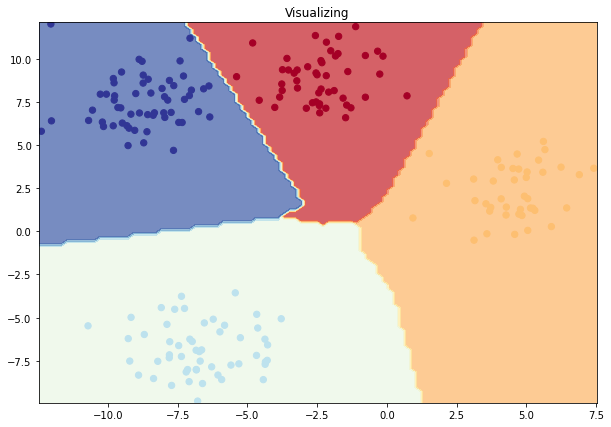

In [ ]:
# visulizing the predictions
plt.figure(figsize=(10,7))
plt.title("Visualizing")
plot_decision_boundary(model_1,X_blob_test,y_blob_test)